In [ ]:
#prepare a linear regression model for bike prices
import numpy as np
import pandas as pd
df = pd.read_csv("/content/Bike_Price.csv")
df = df.dropna()
df

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000
...,...,...,...,...,...,...,...,...,...,...
303,304,Bgauss,Bgauss B8,2017,3.0,Boxer,Petrol,185CC,19 Litres,81916
304,305,Bgauss,Bgauss Radiator,2017,3.0,Boxer,Petrol,205CC,20 Litres,82666
305,306,Bgauss,Bgauss Razor,2017,3.0,Boxer,Petrol,185CC,21 Litres,83416
306,307,Bgauss,Bgauss Flash,2017,3.0,Boxer,Petrol,205CC,22 Litres,84166


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                305 non-null    int64  
 1   Bike_company        305 non-null    object 
 2   Bike_model          305 non-null    object 
 3   Manufactured_year   305 non-null    int64  
 4   Engine_warranty     305 non-null    float64
 5   Engine_type         305 non-null    object 
 6   Fuel_type           305 non-null    object 
 7   CC(Cubic capacity)  305 non-null    object 
 8   Fuel_Capacity       305 non-null    object 
 9   Price               305 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 26.2+ KB


In [ ]:
df["Bike_company"] = df.groupby("Bike_company")["Price"].transform("mean")
df["Bike_model"] = df.groupby("Bike_model")["Price"].transform("mean")
df["Engine_type"] = df.groupby("Engine_type")["Price"].transform("mean")
df["Fuel_type"] = df.groupby("Fuel_type")["Price"].transform("mean")
df["CC(Cubic capacity)"] = df.groupby("CC(Cubic capacity)")["Price"].transform("mean")
df["Fuel_Capacity"] = df.groupby("Fuel_Capacity")["Price"].transform("mean")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df1

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,0.000000,0.167208,0.036416,0.983766,0.062500,0.025718,1.0,0.034236,0.027686,0.036416
1,0.003257,0.044845,0.014451,0.983766,0.062500,0.013281,1.0,0.002703,0.033046,0.011561
2,0.006515,0.014929,0.018497,0.983766,0.062500,0.064104,1.0,0.064906,0.010279,0.020231
3,0.009772,0.023111,0.022351,0.983766,0.062500,0.025718,1.0,0.014137,0.014546,0.023122
4,0.013029,0.336540,0.008960,0.983766,0.062500,0.013281,1.0,0.141642,0.007414,0.008671
...,...,...,...,...,...,...,...,...,...,...
300,0.986971,0.023265,0.018449,0.982143,0.020833,0.064104,1.0,0.007615,0.247540,0.018449
301,0.990228,0.023265,0.018882,0.982143,0.020833,0.064104,1.0,0.006932,0.235398,0.018882
302,0.993485,0.023265,0.019316,0.982143,0.020833,0.064104,1.0,0.007615,0.325572,0.019316
303,0.996743,0.023265,0.019749,0.982143,0.020833,0.064104,1.0,0.006932,0.295967,0.019749


In [ ]:
y=df1["Price"]
x=df1.drop("Price",axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train,x_test,y_train,y_test

(         S.no  Bike_company  Bike_model  Manufactured_year  Engine_warranty  \
 188  0.622150      0.357749    0.104047           0.982143         0.166667   
 290  0.954397      0.011468    0.010398           0.983225         0.041667   
 192  0.635179      0.336540    0.015029           0.983766         0.062500   
 224  0.739414      0.616244    0.156070           0.983766         0.166667   
 284  0.934853      0.014929    0.015896           0.983766         0.083333   
 ..        ...           ...         ...                ...              ...   
 203  0.671010      0.019303    0.013584           0.981061         0.083333   
 255  0.840391      1.000000    0.653130           0.982684         0.208333   
 72   0.237785      0.005679    0.008671           0.981602         0.000000   
 235  0.775244      0.384035    0.179191           0.982684         0.083333   
 37   0.123779      0.019303    0.022543           0.981602         0.062500   
 
      Engine_type  Fuel_type  CC(Cubic

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([-1.94038026e-03, -9.48267994e-03,  8.87354061e-01,  4.73573709e-03,
        1.41681122e-02,  6.48083488e-03,  7.24865427e-04,  1.25581508e-01,
        4.17393155e-02])

In [ ]:
model.intercept_

-0.011680056020350549

In [ ]:
y_test_predict = model.predict(x_test)
y_test_predict

array([ 2.27841406e-01,  2.68658752e-02,  1.97407362e-01,  7.36266557e-02,
        5.52284671e-01,  1.44123386e-02,  7.26307222e-02,  5.53388727e-01,
        2.08866659e-02,  1.09305542e-02,  2.94309880e-01,  5.03349942e-01,
        7.13638479e-03,  9.96116858e-02,  8.85775134e-03,  3.04916597e-02,
        3.68240395e-02,  1.96781606e-01,  2.60589386e-02,  7.54322104e-01,
        1.82733537e-01,  2.39435216e-02,  7.71932904e-03,  2.18545687e-02,
        4.68544299e-02,  2.13817197e-01,  7.36233020e-03, -6.64316522e-04,
        1.62212330e-01,  5.26557153e-03,  1.06915537e-01,  5.12896943e-02,
        2.95417788e-01,  5.10935664e-02,  2.99496756e-01, -7.64822798e-04,
        1.31031215e-02,  5.70475225e-02,  1.55285265e-02,  3.13428416e-02,
        8.04520284e-03,  3.22190549e-02,  8.73684890e-02,  3.58668134e-01,
        8.97085244e-02,  8.91986374e-02,  8.76154115e-02,  1.75061113e-02,
        8.89878121e-02,  4.46870079e-01,  2.53001245e-02,  5.26034538e-02,
        8.90882963e-02,  

In [ ]:
model.score(x_test,y_test)

0.9629450880162068

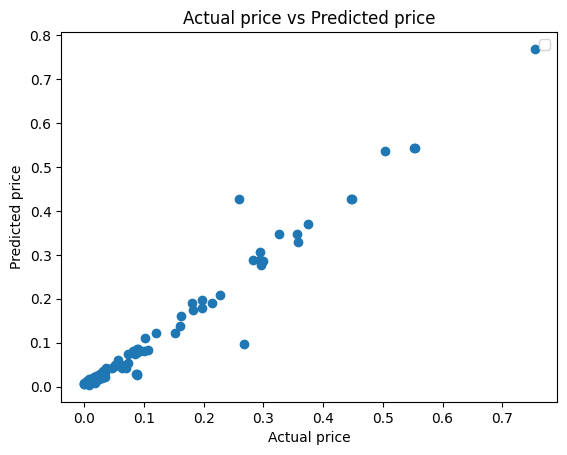

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test_predict,y_test)
plt.legend()
plt.title("Actual price vs Predicted price")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'S.no'),
  Text(1, 0, 'Bike_company'),
  Text(2, 0, 'Bike_model'),
  Text(3, 0, 'Manufactured_year'),
  Text(4, 0, 'Engine_warranty'),
  Text(5, 0, 'Engine_type'),
  Text(6, 0, 'Fuel_type'),
  Text(7, 0, 'CC(Cubic capacity)'),
  Text(8, 0, 'Fuel_Capacity')])

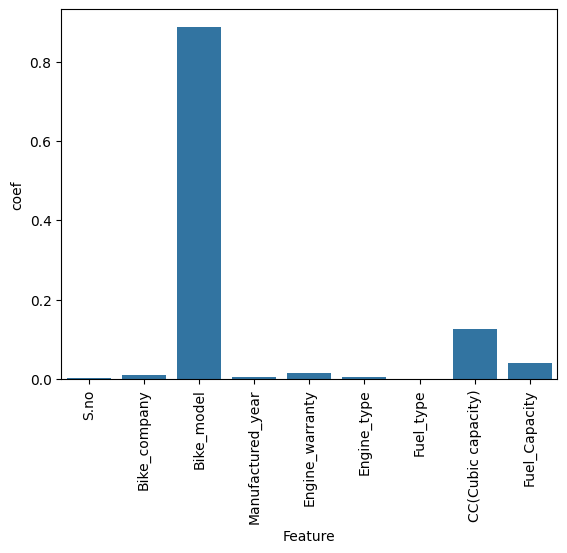

In [ ]:
import seaborn as sns
imp = pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),columns=["Feature","coef"])
sns.barplot(x='Feature',y='coef',data=imp)
plt.xticks(rotation=90)